In [19]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense


In [21]:
# Initialising the CNN
classifier = Sequential()


# add conv
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))

#number of Filter   32
#size 3 x 3 

#64x64 3 color (RGB) rectify 


In [ ]:
# pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# second conv
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# flatten
classifier.add(Flatten())



In [ ]:
# add 128 node in hidden layer
classifier.add(Dense(units = 128, activation = 'relu'))

# add softmax  true or false
classifier.add(Dense(units = 1, activation = 'sigmoid'))

# compile CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [ ]:

from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('dataset/training_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary')
test_set = test_datagen.flow_from_directory('dataset/test_set',
    target_size = (64, 64),
    batch_size = 32,
    class_mode = 'binary')
classifier.fit_generator(training_set,
    steps_per_epoch = 8000,
    epochs = 2,
    validation_data = test_set,
    validation_steps = 2000)

In [ ]:
#save
classifier.save("with_opt2.h5");



In [29]:
from keras.models import load_model
import numpy as np
from keras.preprocessing import image

#load
pre_train = load_model('catordog.h5')
assert pre_train



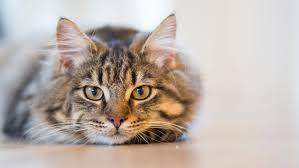

cats


In [30]:

#Display in jupyter
from IPython.display import Image

# test 
img = 'dataset/single_prediction/kt1.jpg'


display(Image(img))
test_image = image.load_img(img, target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = pre_train.predict(test_image)

if result[0][0] == 1:
    prediction = 'dog'

else:
    prediction = 'cats'
    
print(prediction)